In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import glob
import matplotlib.image as mpimg
import os

### Our New Object
- obj_000016 = headphones

### LM 15 Objects
1. ape
2. benchvise
3. bowl
4. camera
5. wateringcan
6. cat
7. cup
8. driller
9. duck
10. eggbox
11. glue
12. holepuncher
13. iron
14. lamp
15. phone




In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


We ran 5 trainings with different objects:

1. 8: Original LM 8 objects (ape, wateringcan, cat, driller, duck, eggbox, glue, holepuncher)
2. 8: Replace holepuncher with headphones
3. 9: 8 + headphones
4. 9: 8 + lamp
5. 16: All 16 objects

In [3]:
!ls "/content/gdrive/MyDrive/Colab Notebooks/251_csv/"

000048_rgb_000002  class16	   class8-no16	class9-14  LM7-16
casapose_notes	   class8-no12-16  class8v2	class9-16  LM8


### Training 1 - Inital 8 Objects

In [4]:
csv_path = '/content/gdrive/MyDrive/Colab Notebooks/251_csv/'

In [5]:
!ls '/content/gdrive/MyDrive/Colab Notebooks/251_csv/class8-no16/'

header.txt     loss_train.csv  test_summary.csv      train_summary.csv
loss_test.csv  test	       training_checkpoints


In [6]:
class8_no16_path = csv_path + 'class8-no16/'
class8_no12_path = csv_path + 'class8-no12-16/'
class9_14_path = csv_path + 'class9-14/'
class9_16_path = csv_path + 'class9-16/'
class16_path = csv_path + 'class16/'

In [7]:
#class8-no16
df_train_8no16 = pd.read_csv(class8_no16_path + 'loss_train.csv')
df_valid_8no16 = pd.read_csv(class8_no16_path + 'loss_test.csv')
df_train_summary_8no16 = pd.read_csv(class8_no16_path + 'train_summary.csv')
df_valid_summary_8no16 = pd.read_csv(class8_no16_path + 'test_summary.csv')

#class8-no12-16
df_train_8no12 = pd.read_csv(class8_no12_path + 'loss_train.csv')
df_valid_8no12 = pd.read_csv(class8_no12_path + 'loss_test.csv')
df_train_summary_8no12 = pd.read_csv(class8_no12_path + 'train_summary.csv')
df_valid_summary_8no12 = pd.read_csv(class8_no12_path + 'test_summary.csv')

#class9-14
df_train_9_14 = pd.read_csv(class9_14_path + 'loss_train.csv')
df_valid_9_14 = pd.read_csv(class9_14_path + 'loss_test.csv')
df_train_summary_9_14 = pd.read_csv(class9_14_path + 'train_summary.csv')
df_valid_summary_9_14 = pd.read_csv(class9_14_path + 'test_summary.csv')

#class9-16
df_train_9_16 = pd.read_csv(class9_16_path + 'loss_train.csv')
df_valid_9_16 = pd.read_csv(class9_16_path + 'loss_test.csv')
df_train_summary_9_16 = pd.read_csv(class9_16_path + 'train_summary.csv')
df_valid_summary_9_16 = pd.read_csv(class9_16_path + 'test_summary.csv')

#class16
df_train_16 = pd.read_csv(class16_path + 'loss_train.csv')
df_valid_16 = pd.read_csv(class16_path + 'loss_test.csv')
df_train_summary_16 = pd.read_csv(class16_path + 'train_summary.csv')
df_valid_summary_16 = pd.read_csv(class16_path + 'test_summary.csv')

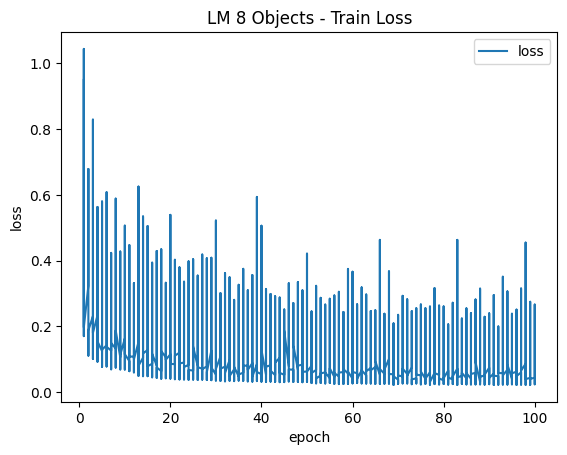

In [8]:
df_train_8no16[['epoch', 'loss']].plot(
    x='epoch',
    xlabel='epoch',
    ylabel='loss',
    title='LM 8 Objects - Train Loss'
)
plt.show()

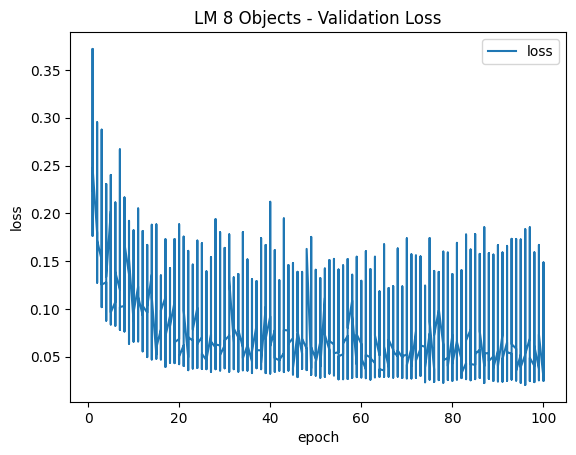

In [9]:
df_valid_8no16[['epoch', 'loss']].plot(
    x='epoch',
    xlabel='epoch',
    ylabel='loss',
    title='LM 8 Objects - Validation Loss'
)
plt.show()

In [10]:
for col in df_train_summary_8no16.columns:
    print(col)

epoch
learning_rate
loss
mask_loss
vertex_loss
proxy_loss
keypoint_loss


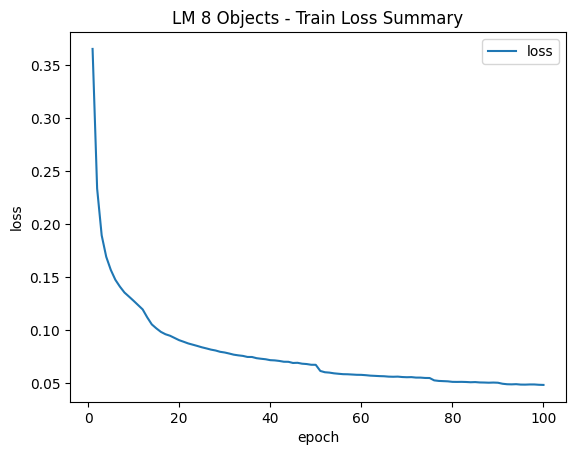

In [11]:
df_train_summary_8no16[['epoch', 'loss']].plot(
    x='epoch',
    xlabel='epoch',
    ylabel='loss',
    title='LM 8 Objects - Train Loss Summary'
)
plt.show()

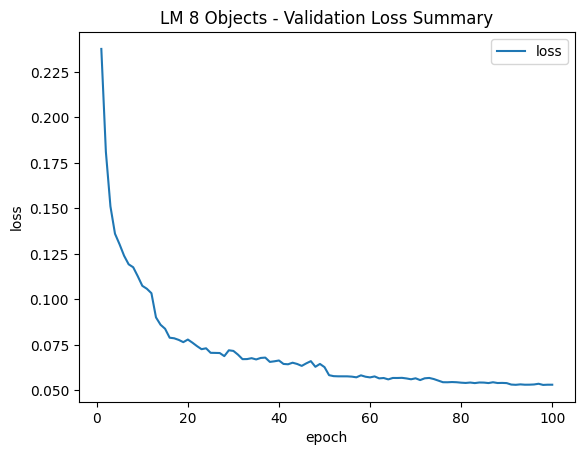

In [12]:
df_valid_summary_8no16[['epoch', 'loss']].plot(
    x='epoch',
    xlabel='epoch',
    ylabel='loss',
    title='LM 8 Objects - Validation Loss Summary'
)
plt.show()

### Compare 8 objects with and without object 000016

In [13]:
df_train_summmary_8 = pd.concat([df_train_summary_8no16['epoch'], df_train_summary_8no16['loss'], df_train_summary_8no12['loss']], axis=1, keys=['epoch','no_16', 'with_16'])
df_valid_summmary_8 = pd.concat([df_valid_summary_8no16['epoch'], df_valid_summary_8no16['loss'], df_valid_summary_8no12['loss']], axis=1, keys=['epoch','no_16', 'with_16'])

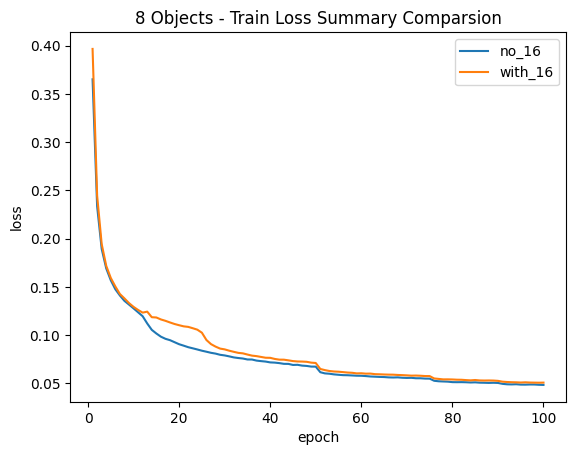

In [14]:
df_train_summmary_8[['epoch', 'no_16', 'with_16']].plot(
    x='epoch',
    xlabel='epoch',
    ylabel='loss',
    title='8 Objects - Train Loss Summary Comparsion'
)
plt.show()

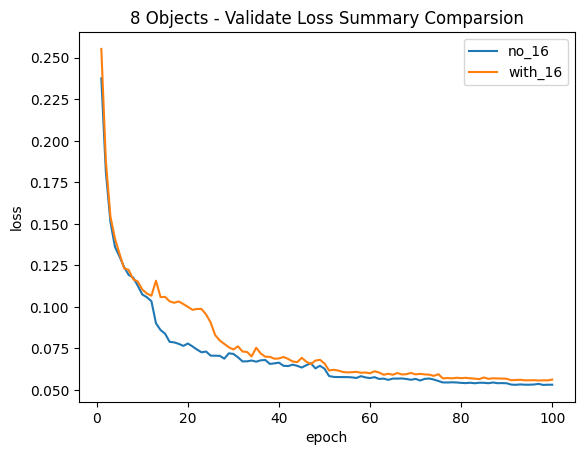

In [15]:
df_valid_summmary_8[['epoch', 'no_16', 'with_16']].plot(
    x='epoch',
    xlabel='epoch',
    ylabel='loss',
    title='8 Objects - Validate Loss Summary Comparsion'
)
plt.show()

### Compare 9 objects with 000016 and 9 object2 with object 000014

In [16]:
df_train_summmary_9 = pd.concat([df_train_summary_9_14['epoch'], df_train_summary_9_14['loss'], df_train_summary_9_16['loss']], axis=1, keys=['epoch','with_14', 'with_16'])
df_valid_summmary_9 = pd.concat([df_valid_summary_9_14['epoch'], df_valid_summary_9_14['loss'], df_valid_summary_9_16['loss']], axis=1, keys=['epoch','with_14', 'with_16'])

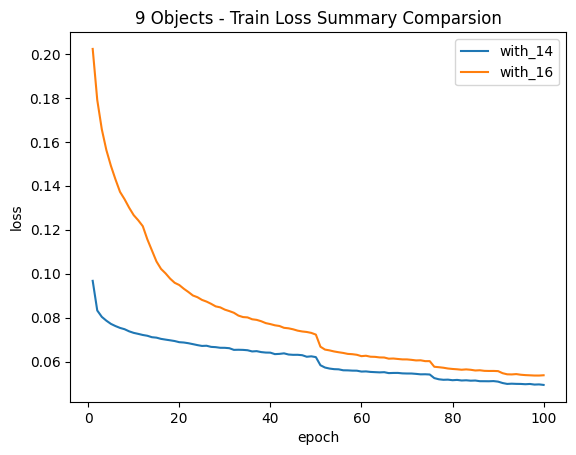

In [17]:
df_train_summmary_9[['epoch', 'with_14', 'with_16']].plot(
    x='epoch',
    xlabel='epoch',
    ylabel='loss',
    title='9 Objects - Train Loss Summary Comparsion'
)
plt.show()

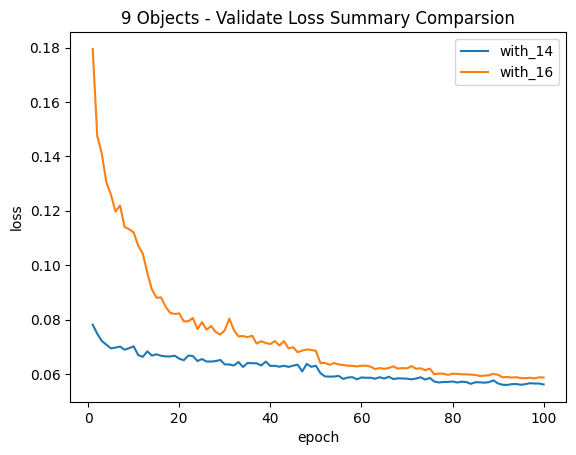

In [18]:
df_valid_summmary_9[['epoch', 'with_14', 'with_16']].plot(
    x='epoch',
    xlabel='epoch',
    ylabel='loss',
    title='9 Objects - Validate Loss Summary Comparsion'
)
plt.show()

In [19]:
df_train_summmary_all = pd.concat([
    df_train_summary_8no16['epoch'],
    df_train_summary_8no16['loss'],
    df_train_summary_8no12['loss'], 
    df_train_summary_9_14['loss'], 
    df_train_summary_9_16['loss'],
    df_train_summary_16['loss']
    ], axis=1, keys=['epoch','LM 8', '8 with 16','9 with 14', '9 with 16', '16 objects'])

df_valid_summmary_all = pd.concat([
    df_valid_summary_8no16['epoch'],
    df_valid_summary_8no16['loss'],
    df_valid_summary_8no12['loss'], 
    df_valid_summary_9_14['loss'], 
    df_valid_summary_9_16['loss'],
    df_valid_summary_16['loss']
    ], axis=1, keys=['epoch','LM 8', '8 with 16','9 with 14', '9 with 16', '16 objects'])

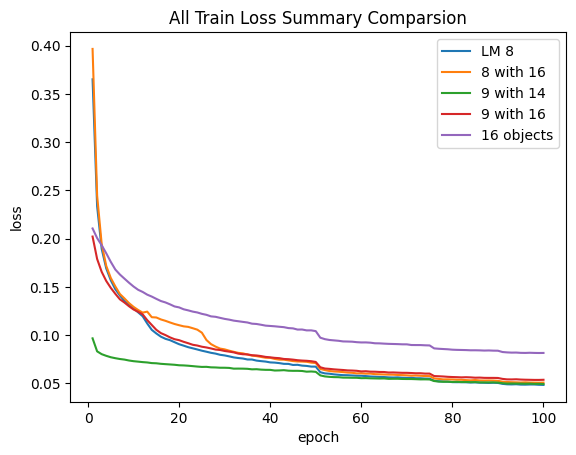

In [20]:
df_train_summmary_all[['epoch','LM 8', '8 with 16','9 with 14', '9 with 16', '16 objects']].plot(
    x='epoch',
    xlabel='epoch',
    ylabel='loss',
    title='All Train Loss Summary Comparsion'
)
plt.show()

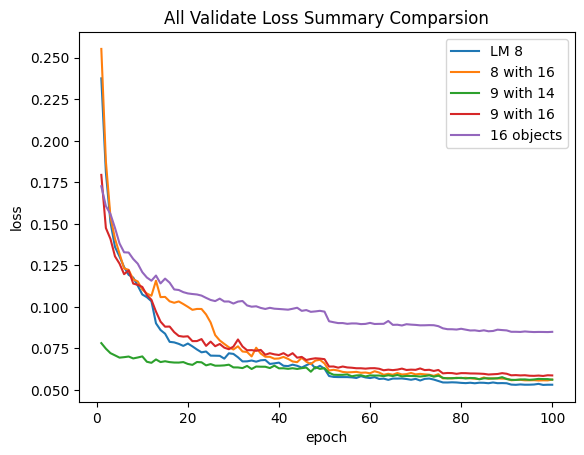

In [21]:
df_valid_summmary_all[['epoch','LM 8', '8 with 16','9 with 14', '9 with 16', '16 objects']].plot(
    x='epoch',
    xlabel='epoch',
    ylabel='loss',
    title='All Validate Loss Summary Comparsion'
)
plt.show()

## Eval Accuracy

In [22]:
!ls "/content/gdrive/MyDrive/Colab Notebooks/251_csv/LM8/"

dani-test  lmo-test  org-lmo


In [23]:
eval_lm8_dani = pd.read_csv(csv_path + 'LM8/dani-test/test_summary_eval.csv')
eval_lm8_lmo = pd.read_csv(csv_path + 'LM8/lmo-test/test_summary_eval.csv')
eval_lm8_org = pd.read_csv(csv_path + 'LM8/org-lmo/test_summary_eval.csv')
eval_obj16_dani = pd.read_csv(csv_path + 'LM7-16/dani-test/test_summary_eval.csv')
eval_obj16_lmo = pd.read_csv(csv_path + 'LM7-16/lmo-test/test_summary_eval.csv')

In [24]:
for col in eval_lm8_dani.columns:
    print(col)

loss
mask_loss
vertex_loss
proxy_loss
kp_loss
time
2d_obj_000001
2d_obj_000005
2d_obj_000006
2d_obj_000008
2d_obj_000009
2d_obj_000010
2d_obj_000011
2d_obj_000012
2d_mean
3d_obj_000001
3d_obj_000005
3d_obj_000006
3d_obj_000008
3d_obj_000009
3d_obj_000010
3d_obj_000011
3d_obj_000012
3d_mean


### Compare Objects 1, 5, 6, 8, 9, 10, 11, 12

In [25]:
df_eval_8 = pd.concat([eval_lm8_org, eval_lm8_lmo, eval_lm8_dani])

In [26]:
df_eval_8 = df_eval_8.set_axis(['Baseline','LM-O','Synthetic'], axis='index')

In [27]:
display(df_eval_8[['loss', '2d_mean', '2d_obj_000001', '2d_obj_000005', '2d_obj_000006', '2d_obj_000008', '2d_obj_000009', '2d_obj_000010', '2d_obj_000011', '2d_obj_000012']])

,loss,2d_mean,2d_obj_000001,2d_obj_000005,2d_obj_000006,2d_obj_000008,2d_obj_000009,2d_obj_000010,2d_obj_000011,2d_obj_000012
Baseline,0.255217,0.2404,0.7838,0.5607,0.6021,0.6331,0.0000,0.4373,0.7603,0.5465
LM-O,0.247634,0.2626,0.8202,0.5725,0.6540,0.6173,0.0017,0.3640,0.7008,0.5431
Synthetic,0.051887,0.3251,0.8676,0.8452,0.8933,0.8346,0.7679,0.8594,0.8216,0.8363


In [42]:
display(df_eval_8[['loss', '3d_obj_000001', '3d_obj_000005', '3d_obj_000006', '3d_obj_000008', '3d_obj_000009', '3d_obj_000010', '3d_obj_000011', '3d_obj_000012']])

,loss,3d_obj_000001,3d_obj_000005,3d_obj_000006,3d_obj_000008,3d_obj_000009,3d_obj_000010,3d_obj_000011,3d_obj_000012
Baseline,0.255217,0.5965,0.1518,0.5733,0.2583,0.1469,0.5549,0.3430,0.3581
LM-O,0.247634,0.6305,0.1408,0.5865,0.2662,0.2417,0.5527,0.2760,0.3696
Synthetic,0.051887,0.6807,0.5262,0.7834,0.4173,0.7137,0.7083,0.5603,0.5894


### Compare Objects 1, 5, 6, 8, 9, 10, 11, 16

In [29]:
df_eval_obj16 = pd.concat([eval_obj16_lmo, eval_obj16_dani])

In [30]:
df_eval_obj16 = df_eval_obj16.set_axis(['LM-O','Synthetic'], axis='index')

In [31]:
display(df_eval_obj16[['loss', '2d_mean', '2d_obj_000001', '2d_obj_000005', '2d_obj_000006', '2d_obj_000008', '2d_obj_000009', '2d_obj_000010', '2d_obj_000011', '2d_obj_000016']])

,loss,2d_mean,2d_obj_000001,2d_obj_000005,2d_obj_000006,2d_obj_000008,2d_obj_000009,2d_obj_000010,2d_obj_000011,2d_obj_000016
LM-O,0.250728,0.2669,0.7970,0.5742,0.5717,0.6007,0.0000,0.3918,0.0000,0.4420
Synthetic,0.068309,0.2854,0.8435,0.8180,0.8798,0.7968,0.7028,0.8417,0.7222,0.7961


In [43]:
display(df_eval_obj16[['loss', '3d_obj_000001', '3d_obj_000005', '3d_obj_000006', '3d_obj_000008', '3d_obj_000009', '3d_obj_000010', '3d_obj_000011', '3d_obj_000016']])

,loss,3d_obj_000001,3d_obj_000005,3d_obj_000006,3d_obj_000008,3d_obj_000009,3d_obj_000010,3d_obj_000011,3d_obj_000016
LM-O,0.250728,0.6139,0.2251,0.5280,0.1900,0.2545,0.5916,0.0000,0.3338
Synthetic,0.068309,0.6481,0.4791,0.7679,0.3838,0.6584,0.6719,0.5409,0.5544


## Compare Obj000016 with 8, 9 16 objects models

In [33]:
eval_8no12 = pd.read_csv(class8_no12_path + 'test/test_summary_eval.csv')
eval_9_16 = pd.read_csv(class9_16_path + 'test/test_summary_eval.csv')
eval_16 = pd.read_csv(class16_path + 'test/test_summary_eval.csv')

In [34]:
df_eval_obj16_only = pd.concat([eval_8no12, eval_9_16, eval_16])
df_eval_obj16_only = df_eval_obj16_only.set_axis(['8','9', '16'], axis='index')
display(df_eval_obj16_only[['loss', '2d_obj_000016', '3d_obj_000016']])

,loss,2d_obj_000016,3d_obj_000016
8,0.068309,0.7961,0.5544
9,0.070426,0.7892,0.5394
16,0.091884,0.7644,0.5420


## Image Output Example

In [35]:
!ls "/content/gdrive/MyDrive/Colab Notebooks/251_csv/000048_rgb_000002"

color_dir_0_gt.png  color_dir_4_gt.png	color_dir_8_gt.png  conf_dir_5.png
color_dir_0.png     color_dir_4.png	color_dir_8.png     conf_dir_6.png
color_dir_1_gt.png  color_dir_5_gt.png	color.png	    conf_dir_7.png
color_dir_1.png     color_dir_5.png	conf_dir_0.png	    conf_dir_8.png
color_dir_2_gt.png  color_dir_6_gt.png	conf_dir_1.png	    cuboids.png
color_dir_2.png     color_dir_6.png	conf_dir_2.png	    mask_gt.png
color_dir_3_gt.png  color_dir_7_gt.png	conf_dir_3.png	    mask.png
color_dir_3.png     color_dir_7.png	conf_dir_4.png


In [36]:
img_path = csv_path + '000048_rgb_000002'

In [37]:
img_path

'/content/gdrive/MyDrive/Colab Notebooks/251_csv/000048_rgb_000002'

In [38]:
label_names = [os.path.basename(x) for x in sorted(glob.glob(img_path + '/*.png'))]

In [39]:
label_names

['color.png',
 'color_dir_0.png',
 'color_dir_0_gt.png',
 'color_dir_1.png',
 'color_dir_1_gt.png',
 'color_dir_2.png',
 'color_dir_2_gt.png',
 'color_dir_3.png',
 'color_dir_3_gt.png',
 'color_dir_4.png',
 'color_dir_4_gt.png',
 'color_dir_5.png',
 'color_dir_5_gt.png',
 'color_dir_6.png',
 'color_dir_6_gt.png',
 'color_dir_7.png',
 'color_dir_7_gt.png',
 'color_dir_8.png',
 'color_dir_8_gt.png',
 'conf_dir_0.png',
 'conf_dir_1.png',
 'conf_dir_2.png',
 'conf_dir_3.png',
 'conf_dir_4.png',
 'conf_dir_5.png',
 'conf_dir_6.png',
 'conf_dir_7.png',
 'conf_dir_8.png',
 'cuboids.png',
 'mask.png',
 'mask_gt.png']

In [40]:
images = []
for img_path in sorted(glob.glob(img_path + '/*.png')):
    images.append(mpimg.imread(img_path))

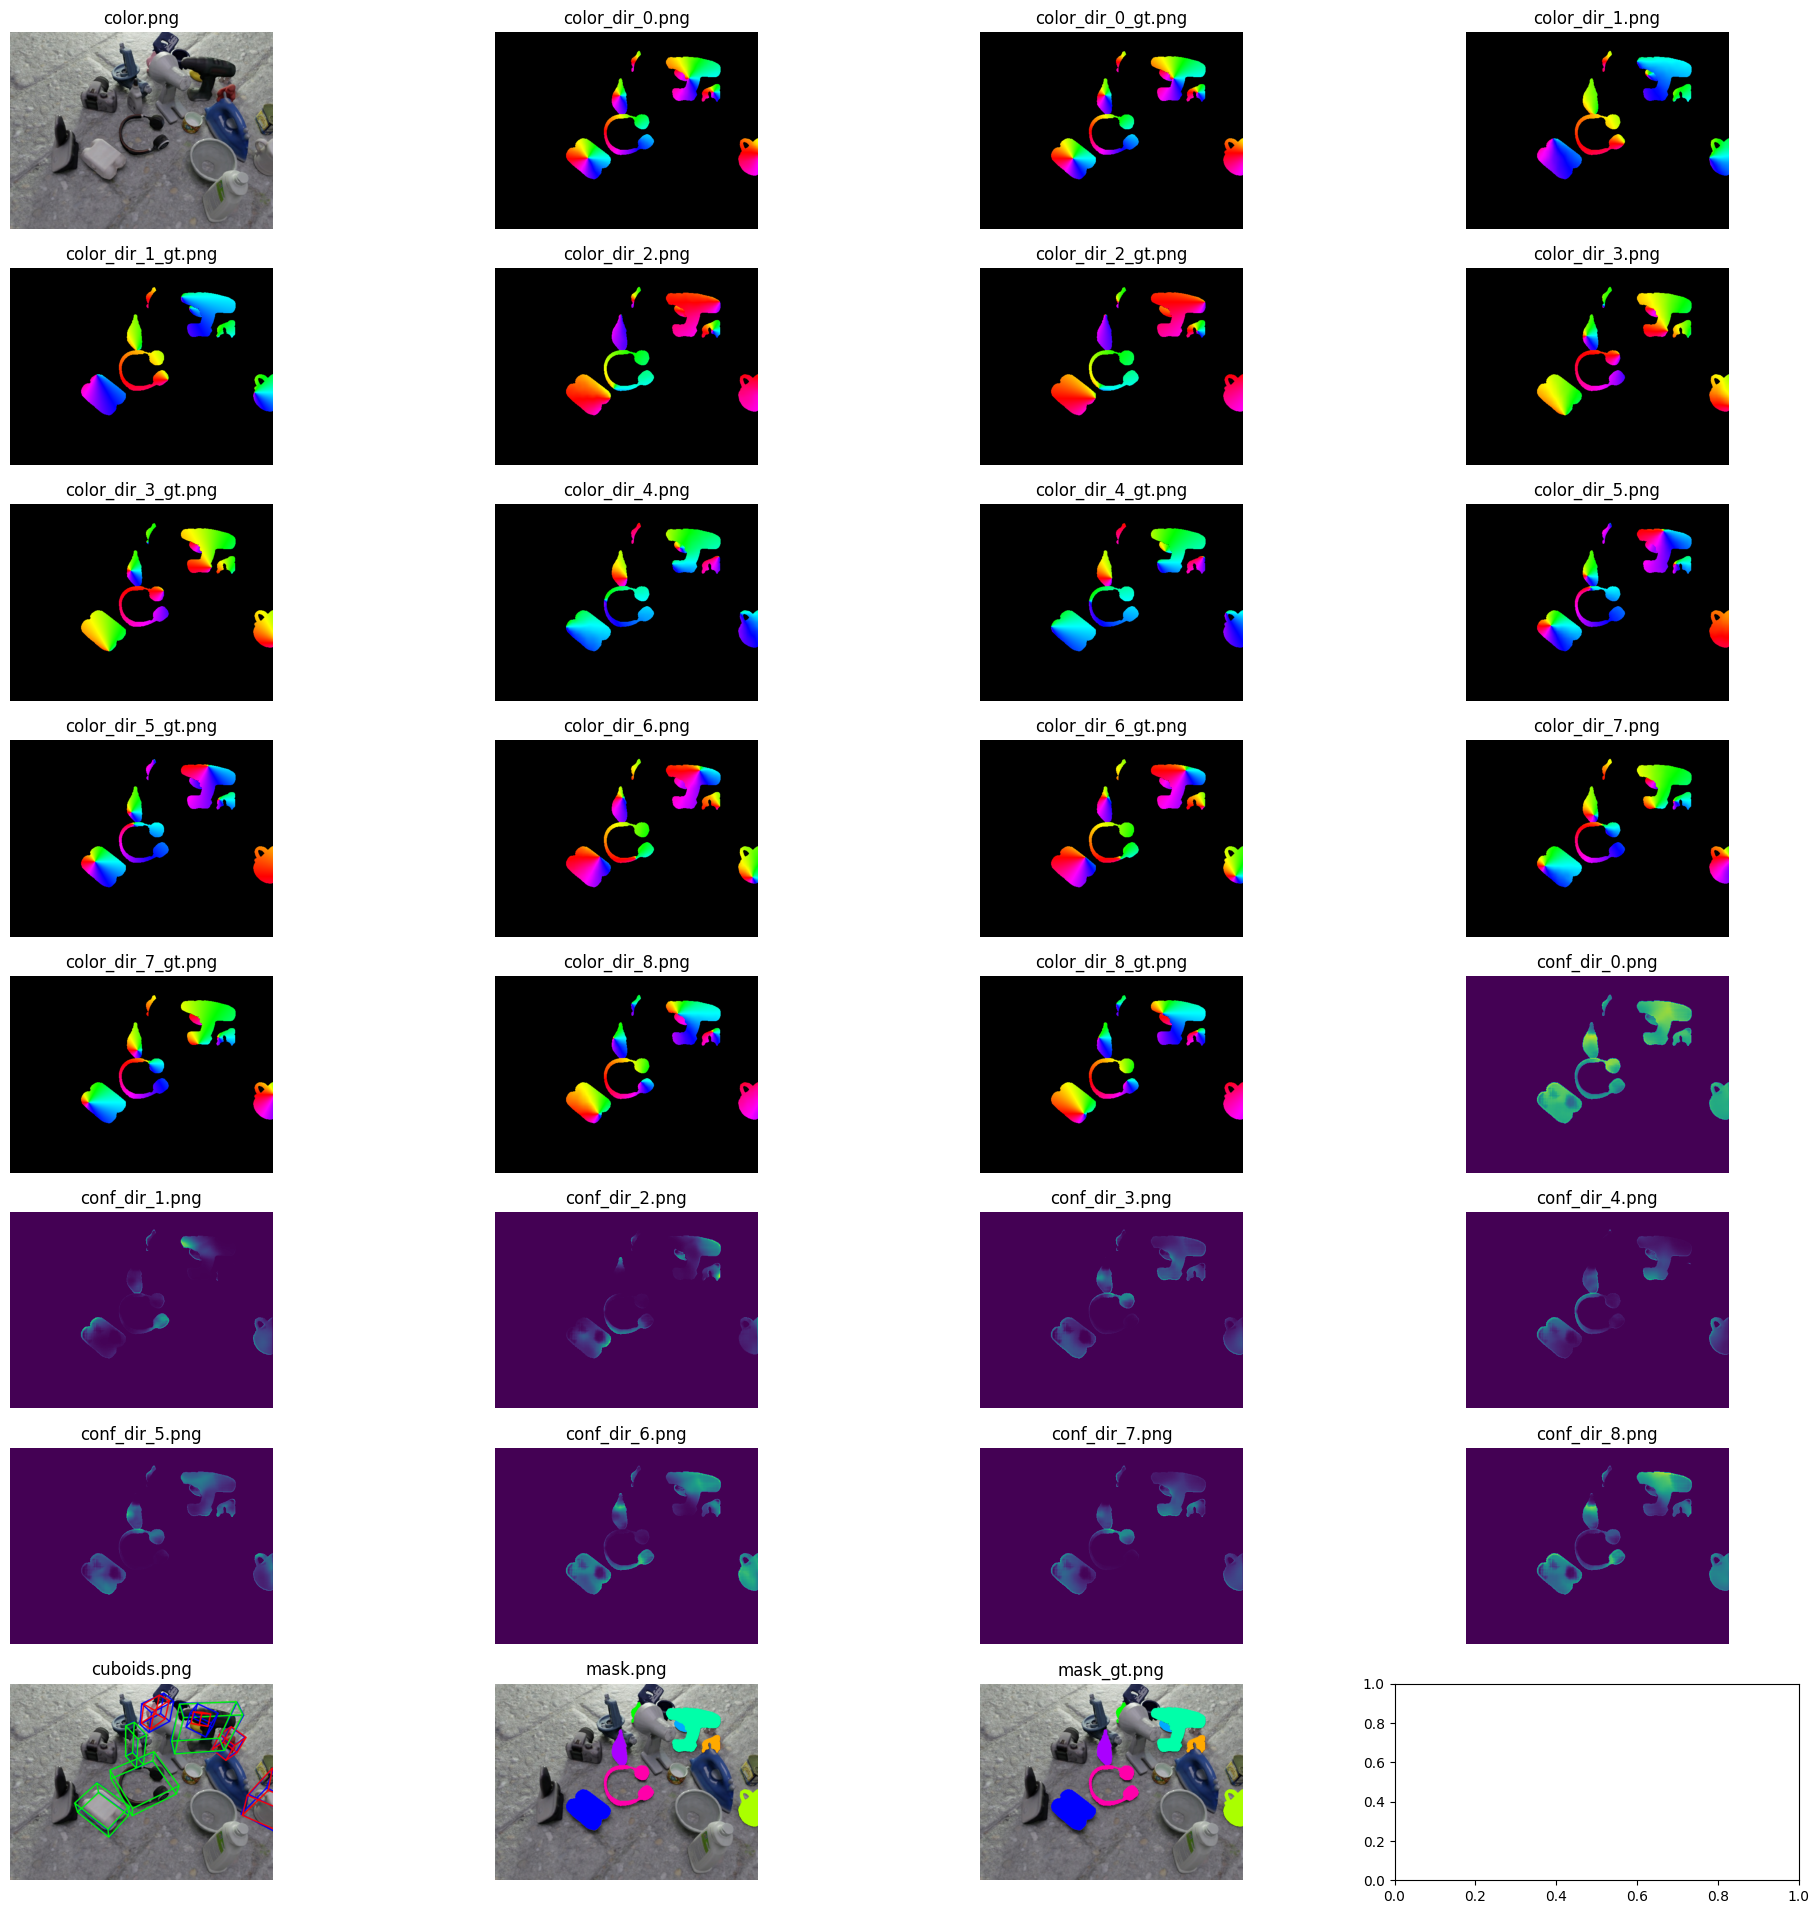

In [41]:
n_row = 8
n_col = 4
_, axs = plt.subplots(n_row, n_col, figsize=(24, 24))
axs = axs.flatten()
for img, label_name, ax in zip(images, label_names, axs):
    ax.imshow(img)
    ax.set_title(label_name)
    ax.axis('off')
plt.show()

In [48]:
img_path_keypoints = csv_path + '000002-keypoints'
label_names_kp = [os.path.basename(x) for x in sorted(glob.glob(img_path_keypoints + '/*.png'))]

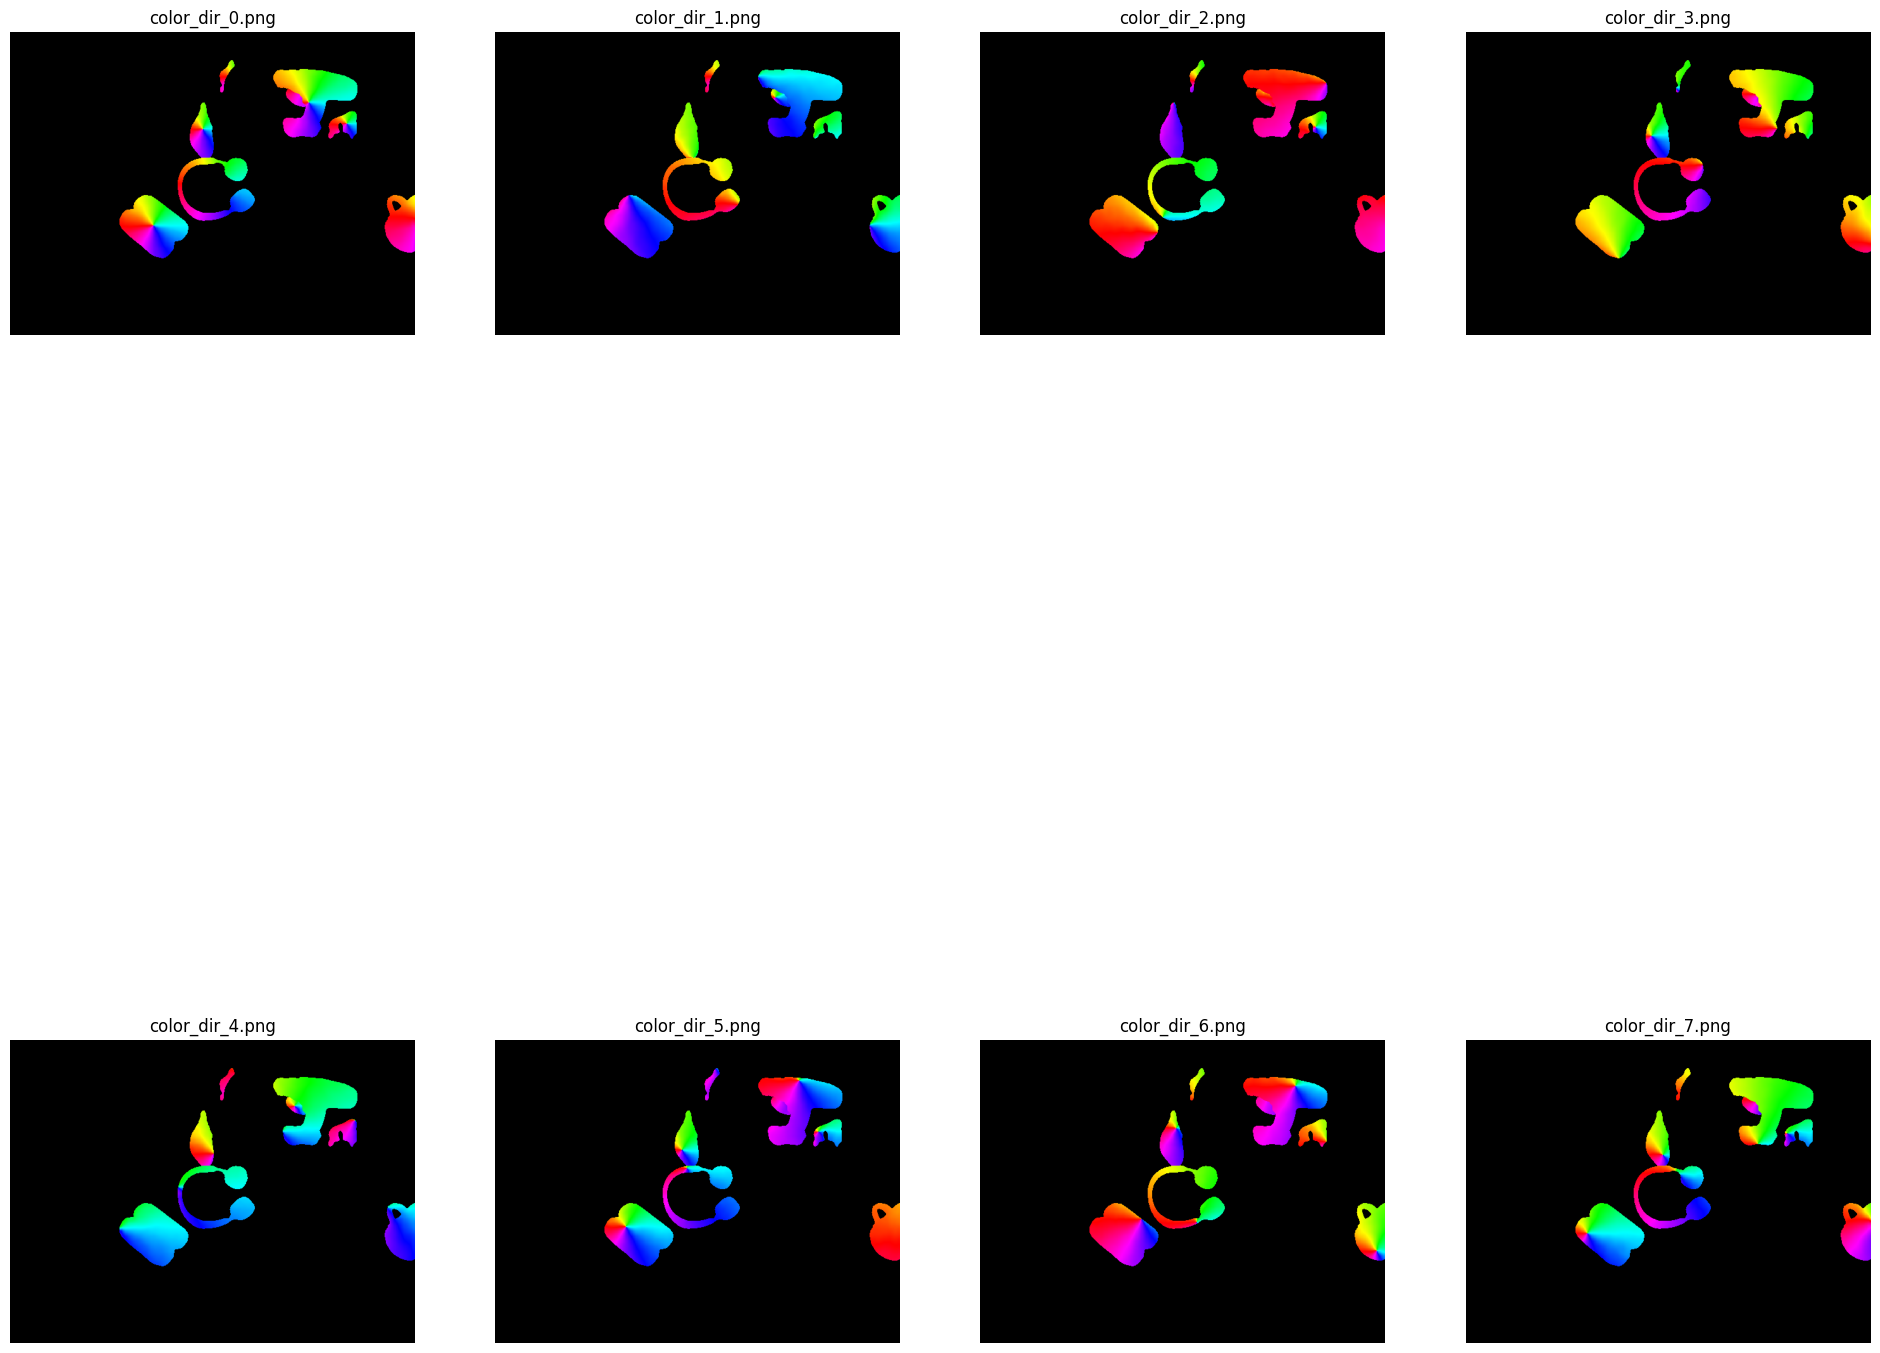

In [50]:
images_kp = []
for img_path in sorted(glob.glob(img_path_keypoints + '/*.png')):
    images_kp.append(mpimg.imread(img_path))

n_row = 2
n_col = 4
_, axs = plt.subplots(n_row, n_col, figsize=(24, 24))
axs = axs.flatten()
for img, label_name, ax in zip(images_kp, label_names_kp, axs):
    ax.imshow(img)
    ax.set_title(label_name)
    ax.axis('off')
plt.show()

In [51]:
img_path_conf = csv_path + '000002-conf'
label_names_conf = [os.path.basename(x) for x in sorted(glob.glob(img_path_conf + '/*.png'))]

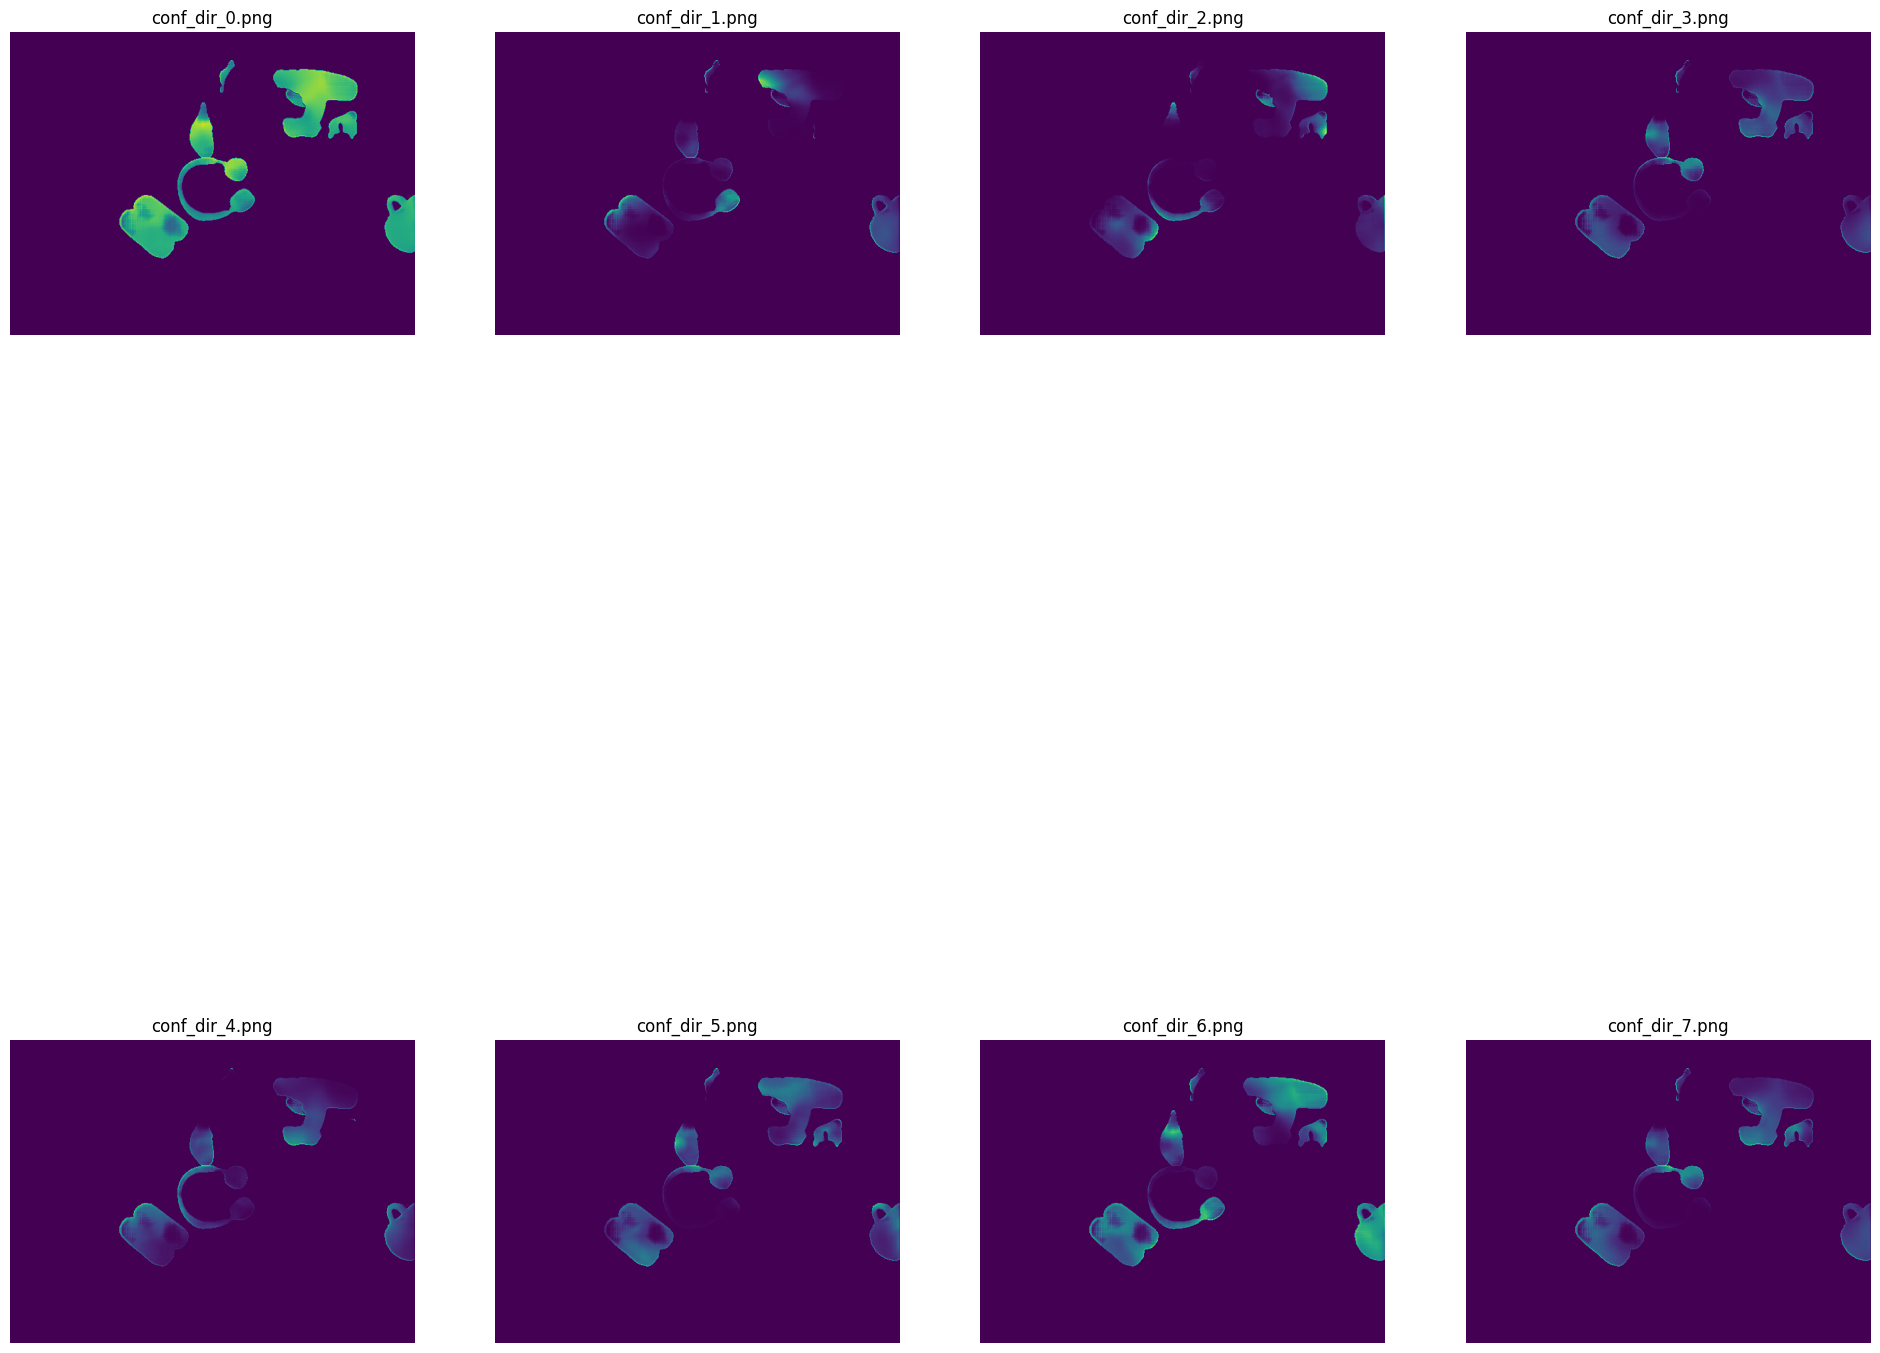

In [53]:
images_conf = []
for img_path in sorted(glob.glob(img_path_conf + '/*.png')):
    images_conf.append(mpimg.imread(img_path))

n_row = 2
n_col = 4
_, axs = plt.subplots(n_row, n_col, figsize=(24, 24))
axs = axs.flatten()
for img, label_name, ax in zip(images_conf, label_names_conf, axs):
    ax.imshow(img)
    ax.set_title(label_name)
    ax.axis('off')
plt.show()